In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from pathlib import Path
import json
import torch
import pytorch_lightning as pl
import seaborn as sns

In [4]:
from roomgraph.data.cubicasa5k import Cubicasa5k
from roomgraph.data.data_module import CubicasaDataModule

from roomgraph.types.config import Config

from roomgraph.cli.train import MODEL_MAP

In [5]:
dm = CubicasaDataModule("../data/processed/cubicasa5k/", 128, 24)


In [6]:
def load_model(path: Path) -> pl.LightningModule:
    config = Config(**json.load(open(path / "config.json", "r")), name=path.stem)
    Model = MODEL_MAP[config.model]
    model = Model.load_from_checkpoint(
        str(path / 'model.ckpt'),
        num_features=Cubicasa5k.NUM_FEATURES,
        num_classes=len(Cubicasa5k.ROOM_CATEGORY_INDEX),
        hidden_channels=config.hidden_channels,
        num_layers=config.num_layers,
        lr=config.lr,
        gamma=config.gamma,
    )
    return model, config

In [7]:
def test_model(model: pl.LightningModule):
    trainer = pl.Trainer()
    results = trainer.test(model, datamodule=dm)
    return results[0]['test_acc']

# Analysis

In [8]:
model_paths = list(Path("../models").glob("2022*"))
model_paths

[PosixPath('../models/20221205-gcn-10'),
 PosixPath('../models/20221205-gcn-2'),
 PosixPath('../models/20221205-gat-10'),
 PosixPath('../models/20221205-gat-2'),
 PosixPath('../models/20221205-gcn-5'),
 PosixPath('../models/20221205-mlp-5'),
 PosixPath('../models/20221205-sage-2'),
 PosixPath('../models/20221205-mlp-10'),
 PosixPath('../models/20221205-gat-5'),
 PosixPath('../models/20221205-sage-5'),
 PosixPath('../models/20221205-tagcn-10'),
 PosixPath('../models/20221205-tagcn-2'),
 PosixPath('../models/20221205-tagcn-5'),
 PosixPath('../models/20221205-mlp-2'),
 PosixPath('../models/20221205-sage-10')]

In [9]:
models = { type: dict() for type in MODEL_MAP.keys() }  
for path in model_paths:
    model, config = load_model(path)
    models[config.model][config.num_layers] = model

In [13]:
models['graphsage'][2]

GraphSAGEModel(
  (criterion): CrossEntropyLoss()
  (acc): MulticlassAccuracy()
  (layers): ModuleList(
    (0): SAGEConv(4, 16, aggr=mean)
    (1): SAGEConv(16, 16, aggr=mean)
  )
  (classifier): Linear(in_features=16, out_features=10, bias=True)
)

In [9]:
model_results = { type: dict() for type in MODEL_MAP.keys() }
for type, models in models.items():
    for num_layers, model in models.items():
        model_results[type][num_layers] = test_model(model)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nickthegroot/.cache/pypoetry/virtualenvs/roomgraph-acy-Ho1w-py3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
Missing logger folder: /home/nickthegroot/School/DSC180A/room-graph/notebooks/lightning_logs


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.30310919880867004
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.18601931631565094
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.29108303785324097
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.29251083731651306
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.2875230610370636
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.2906988561153412
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.30271580815315247
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.31102967262268066
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.3777097463607788
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.288716197013855
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.2977028787136078
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.30242910981178284
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.30414876341819763
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.2843453586101532
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.1262417733669281
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [10]:
results = pd.DataFrame(model_results).sort_index()
results

,ModelType.GAT,ModelType.GCN,ModelType.GRAPHSAGE,ModelType.MLP,ModelType.TAGCN
2,0.186019,0.287523,0.302716,0.302429,0.284345
5,0.291083,0.290699,0.311030,0.288716,0.126242
10,0.303109,0.292511,0.377710,0.297703,0.304149


# Plotting

Text(0.5, 1.0, 'Accuracy vs. Number of Layers')

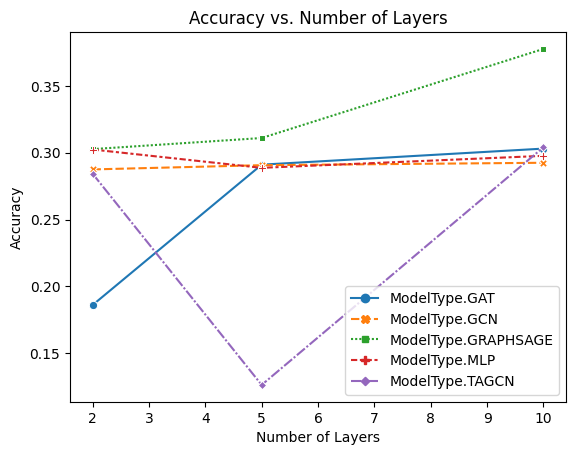

In [11]:
ax = sns.lineplot(data=results, markers=True)
ax.set(xlabel="Number of Layers", ylabel="Accuracy")
ax.set_title("Accuracy vs. Number of Layers")

In [12]:
ax.figure.savefig("../reports/figures/acc-layers.png")

# Analysis

In [13]:
results.max()

ModelType.GAT          0.303109
ModelType.GCN          0.292511
ModelType.GRAPHSAGE    0.377710
ModelType.MLP          0.302429
ModelType.TAGCN        0.304149
dtype: float64

In [28]:
results.idxmax(axis=1)

2     ModelType.GRAPHSAGE
5     ModelType.GRAPHSAGE
10    ModelType.GRAPHSAGE
dtype: object

In [15]:
results.max(axis=1)

2     0.302716
5     0.311030
10    0.377710
dtype: float64

In [16]:
print(results.max(axis=0).to_latex())

\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
ModelType.GAT       &  0.303109 \\
ModelType.GCN       &  0.292511 \\
ModelType.GRAPHSAGE &  0.377710 \\
ModelType.MLP       &  0.302429 \\
ModelType.TAGCN     &  0.304149 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_23204/4270878356.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.max(axis=0).to_latex())


In [17]:
print(results.idxmax(axis=0).to_latex())

\begin{tabular}{lr}
\toprule
{} &   0 \\
\midrule
ModelType.GAT       &  10 \\
ModelType.GCN       &  10 \\
ModelType.GRAPHSAGE &  10 \\
ModelType.MLP       &   2 \\
ModelType.TAGCN     &  10 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_23204/3638403292.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.idxmax(axis=0).to_latex())


# Dataset Stats

In [18]:
dm.setup('fit')
len(dm.train_dataloader().dataset)

4194

In [19]:
train_labels = torch.hstack([dm.train_dataloader().dataset[i].y for i in range(len(dm.train_dataloader().dataset))])
train_labels

tensor([8, 5, 9,  ..., 1, 1, 3])

In [20]:
train_dist = pd.Series(train_labels.numpy())
train_dist

0        8
1        5
2        9
3        4
4        1
        ..
51586    7
51587    3
51588    1
51589    1
51590    3
Length: 51591, dtype: int64

In [21]:
REVERSE_CAT_MAP = {v: k for k, v in Cubicasa5k.ROOM_CATEGORY_INDEX.items()}
train_dist = train_dist.apply(REVERSE_CAT_MAP.get)

[Text(0.5, 0, 'Room Category'), Text(0, 0.5, 'Count')]

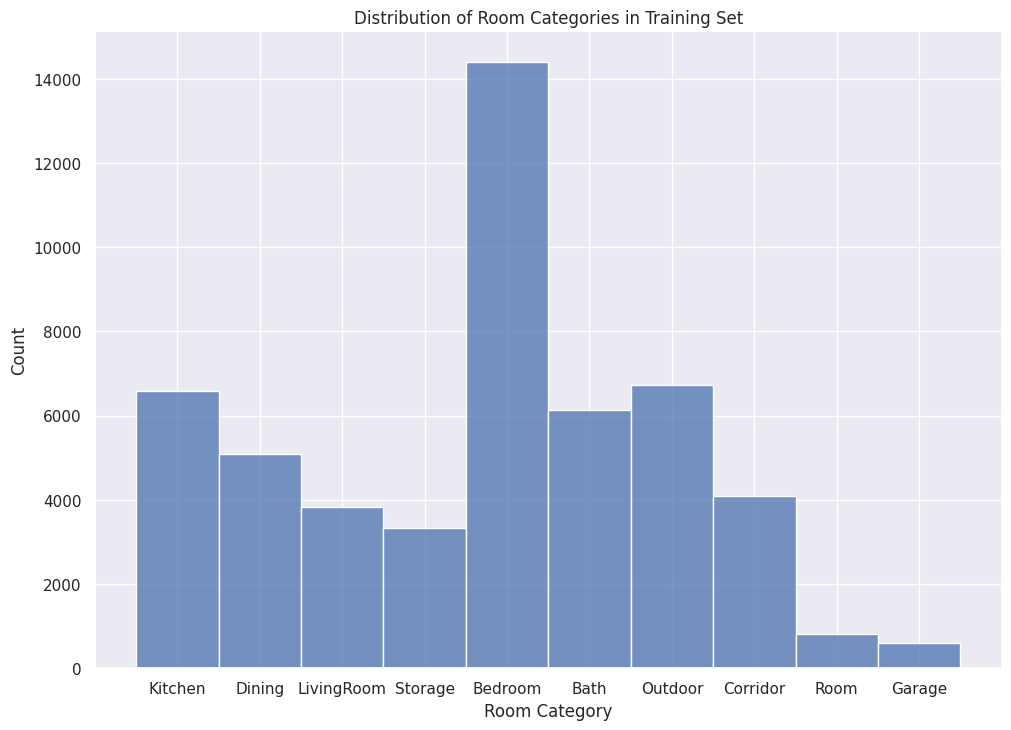

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.histplot(train_dist)
ax.set_title("Distribution of Room Categories in Training Set")
ax.set(xlabel="Room Category", ylabel="Count")

In [23]:
ax.figure.savefig("../reports/figures/cat-dist.png")

In [24]:
train_x = torch.vstack([dm.train_dataloader().dataset[i].x for i in range(len(dm.train_dataloader().dataset))])
train_area = pd.DataFrame(train_x.numpy(), columns=['area', 'width', 'height', 'doors'])
train_area

,area,width,height,doors
0,248040.0,689.0,360.0,1.0
1,54715.0,296.0,201.0,3.0
2,66946.0,238.0,341.0,1.0
3,221427.0,378.0,589.0,2.0
4,20895.0,139.0,154.0,0.0
...,...,...,...,...
51586,99612.5,325.0,307.0,2.0
51587,56942.0,201.0,284.0,2.0
51588,35227.5,116.0,305.0,1.0
51589,34800.0,200.0,174.0,1.0


In [25]:
train = train_area.join(train_dist.rename('category'))
train

,area,width,height,doors,category
0,248040.0,689.0,360.0,1.0,Kitchen
1,54715.0,296.0,201.0,3.0,Dining
2,66946.0,238.0,341.0,1.0,LivingRoom
3,221427.0,378.0,589.0,2.0,Storage
4,20895.0,139.0,154.0,0.0,Bedroom
...,...,...,...,...,...
51586,99612.5,325.0,307.0,2.0,Corridor
51587,56942.0,201.0,284.0,2.0,Bath
51588,35227.5,116.0,305.0,1.0,Bedroom
51589,34800.0,200.0,174.0,1.0,Bedroom


Text(0.5, 1.0, 'Width vs. Height of Rooms in Training Set')

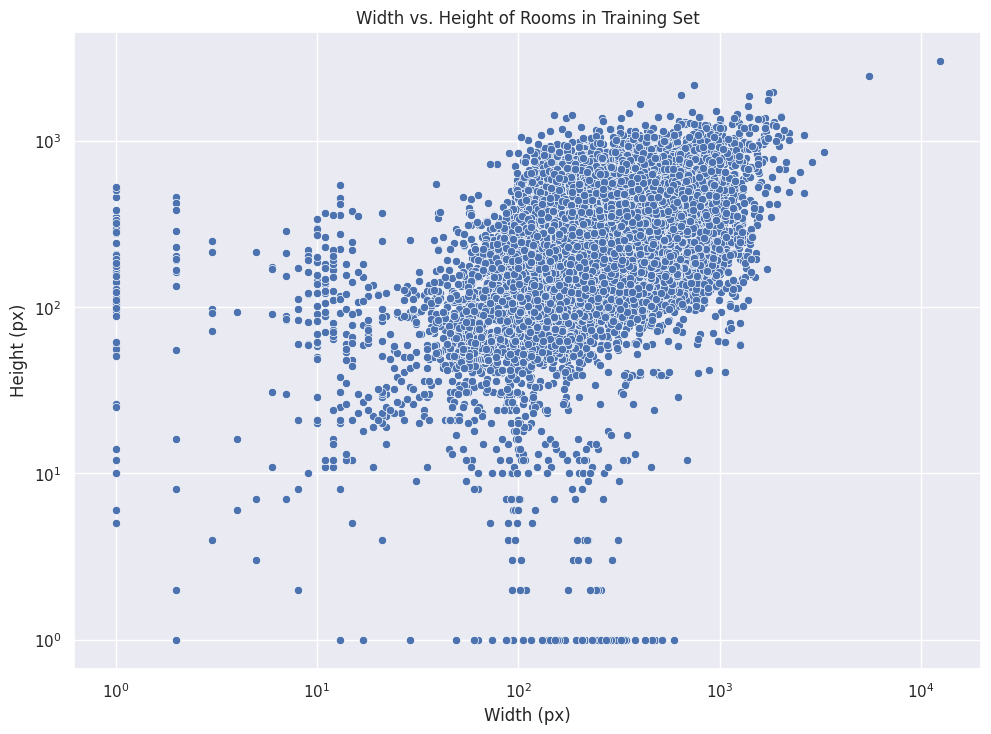

In [26]:
ax = sns.scatterplot(train, x = 'width', y = 'height')
ax.set(xscale="log", yscale="log", xlabel="Width (px)", ylabel="Height (px)")
ax.set_title("Width vs. Height of Rooms in Training Set")

In [27]:
ax.figure.savefig("../reports/figures/dim-dist.png")